In [1]:
import pandas as pd

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)
import numpy as np
import matplotlib.pyplot as pltimport pandas as pd

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)
import numpy as np
import matplotlib.pyplot as plt


## Описание данных:

* InvoiceNo - Идентификатор тразакции
* ProductID - Идентификатор продукта
* Name - Наименвание продукта
* Quantity - Количество
* InvoiceDate - Дата и время тнзакции
* PricePerItem - Цена за единицу
* CustomerID - Идентификатор клиента
* Country - Страна клиента
* InvoiceMonth - Период в который была осуществленна сделка
* InvoiceTime - Время дня совершения сделки
* InvoiceDate_Day - Дата транзакции
* InvoiceDate_Day - Суммарная стоимость

In [2]:
def open_data(path):
    df = pd.read_csv(path, sep = ';')
    df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
    df['InvoiceTime'] = pd.to_datetime(df['InvoiceDate']).dt.hour
    df['InvoiceDate_Day'] = pd.to_datetime(df['InvoiceDate']).dt.date
    df['Sum'] = df['PricePerItem'] * df['Quantity']
    return df
    
df_in = open_data('data/train_data.csv')
print('Всего записей в таблице:', df_in.shape[0])
df_in.head()

Всего записей в таблице: 431673


,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom,2010-01,8,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom,2010-01,8,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34


## Очистка данных

In [3]:
df_clean = df_in
# Удаляем данные без указания клиента
df_clean = df_clean.dropna(subset=['CustomerID'])
df_clean

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom,2010-01,8,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom,2010-01,8,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
431666,573695,23557,LANDMARK FRAME BAKER STREET,2,31.10.11 17:13,12.50,15023.0,United Kingdom,2011-10,17,2011-10-31,25.00
431667,573695,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,31.10.11 17:13,2.55,15023.0,United Kingdom,2011-10,17,2011-10-31,81.60
431668,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,31.10.11 17:13,9.95,15023.0,United Kingdom,2011-10,17,2011-10-31,19.90
431669,573695,23543,WALL ART KEEP CALM,1,31.10.11 17:13,8.25,15023.0,United Kingdom,2011-10,17,2011-10-31,8.25


In [4]:
customers = df_clean.CustomerID.value_counts()
customers_count = len(customers)
customer_max_sum =  df_clean.loc[df_clean.CustomerID == customers.idxmax()]['Sum'].sum()
price_sum = df_clean['Sum'].sum()
Repeat_Purchase_Rate = round(len(customers[customers > 1]) / customers_count * 100, 2)

print('Всего клинтов: ', customers_count)
print('Процент клиентов совершивших повторную покупку:', Repeat_Purchase_Rate)
print('Максимальное количество покупок 1-го клиента: ', customers.max())
print('Он сделал покупок на сумму: ', customer_max_sum)
print('От общей суммы покупок это: ', round(customer_max_sum / price_sum *100, 3), '%')
print('Минимальное количество покупок 1-го клиента: ', customers.min())
print('Он сделал покупок на сумму: ', df_clean.loc[df_in.CustomerID == customers.idxmin()].PricePerItem.sum())
print('Общая сумма сделок совершенных за период: ', price_sum)

Всего клинтов:  4010
Процент клиентов совершивших повторную покупку: 98.1
Максимальное количество покупок 1-го клиента:  6087
Он сделал покупок на сумму:  30746.36
От общей суммы покупок это:  0.45 %
Минимальное количество покупок 1-го клиента:  1
Он сделал покупок на сумму:  0.72
Общая сумма сделок совершенных за период:  6825151.694


In [5]:
# Словарь ниаменований товара по ID
# {'85123A': 'WHITE HANGING HEART T-LIGHT HOLDER', ...}
product_dict = dict(df_clean[['ProductID', 'Name']].drop_duplicates().values)

<AxesSubplot:ylabel='Frequency'>

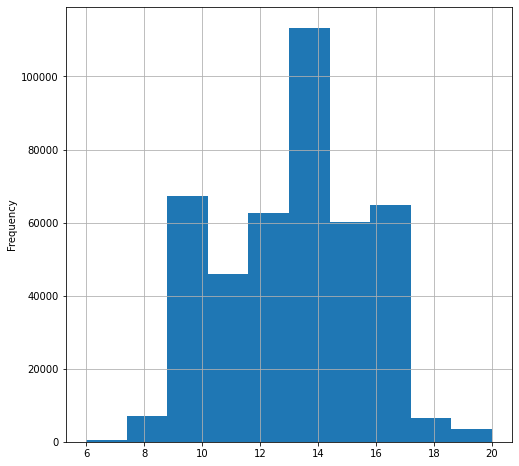

In [6]:
# В какое время дня ниаболее часто совершаются покупки
df_in['InvoiceTime'].plot.hist(figsize =(8, 8),  grid = True,)

array([<AxesSubplot:title={'center':'Sum_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Sum_returns_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_in_month'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_Customers'}, xlabel='InvoiceMonth'>,
       <AxesSubplot:title={'center':'Count_Name'}, xlabel='InvoiceMonth'>],
      dtype=object)

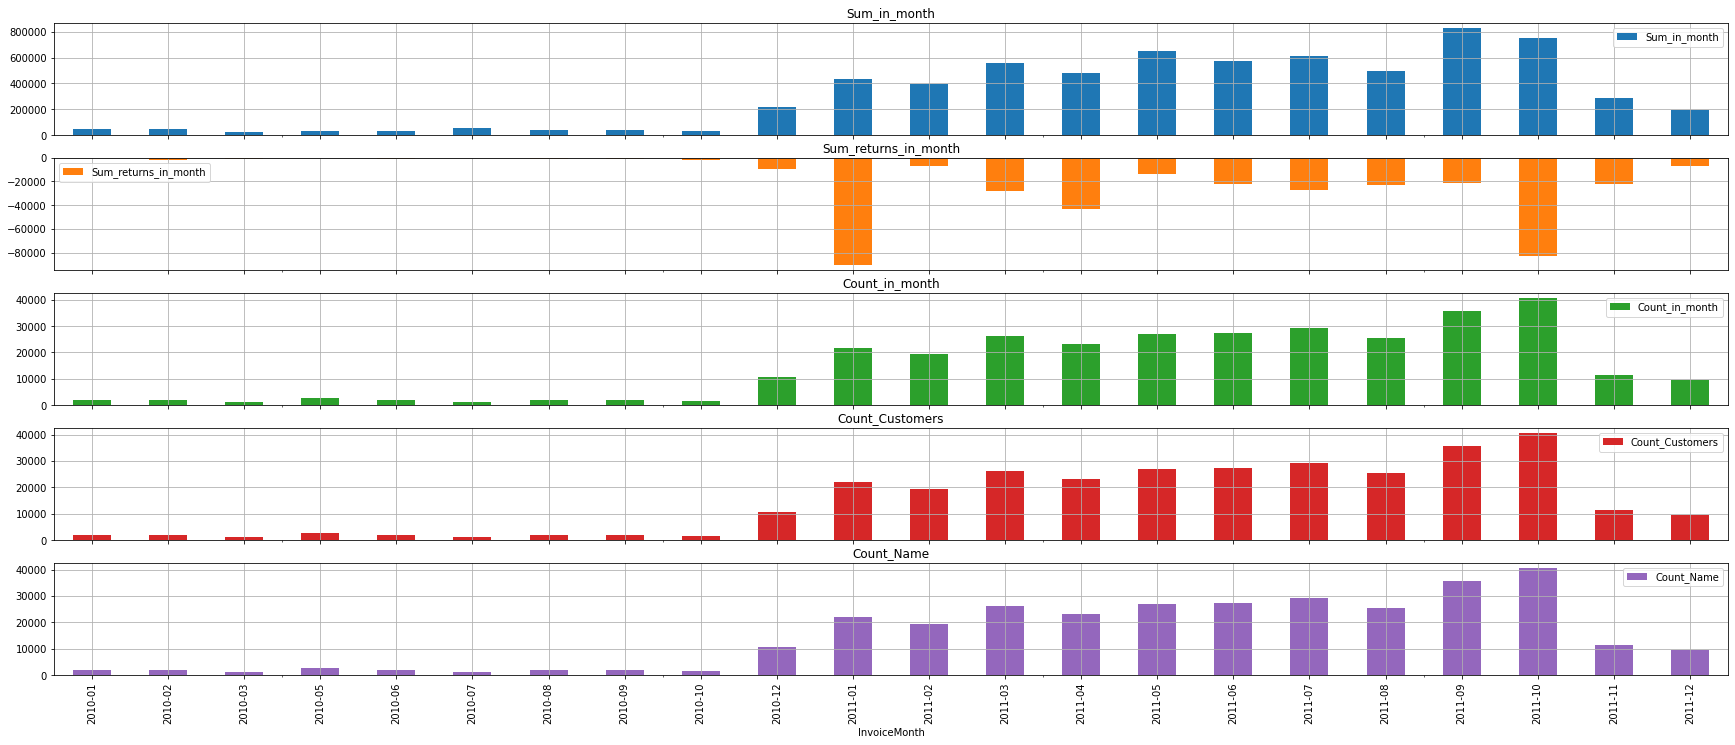

In [7]:
# Распределение количества заказов по месяцам
df_month_data = pd.DataFrame()
df_month_data['Sum_in_month'] = df_clean[['InvoiceMonth', 'Sum']].groupby(by = 'InvoiceMonth').sum()
# Сумма возвратов
df_month_data['Sum_returns_in_month'] = df_clean.loc[df_in['Sum'] < 0, ['InvoiceMonth', 'Sum']].groupby(by = 'InvoiceMonth').sum()
df_month_data['Count_in_month'] = df_clean['InvoiceMonth'].value_counts(sort = False).sort_index(ascending=True)
df_month_data['Count_Customers'] = df_clean[['InvoiceMonth', 'CustomerID']].groupby(by = 'InvoiceMonth').count()
df_month_data['Count_Name'] = df_clean[['InvoiceMonth', 'Name']].groupby(by = 'InvoiceMonth').count()
df_month_data.plot.bar(figsize =(30, 12),  grid = True,
                       subplots = True
                      )

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

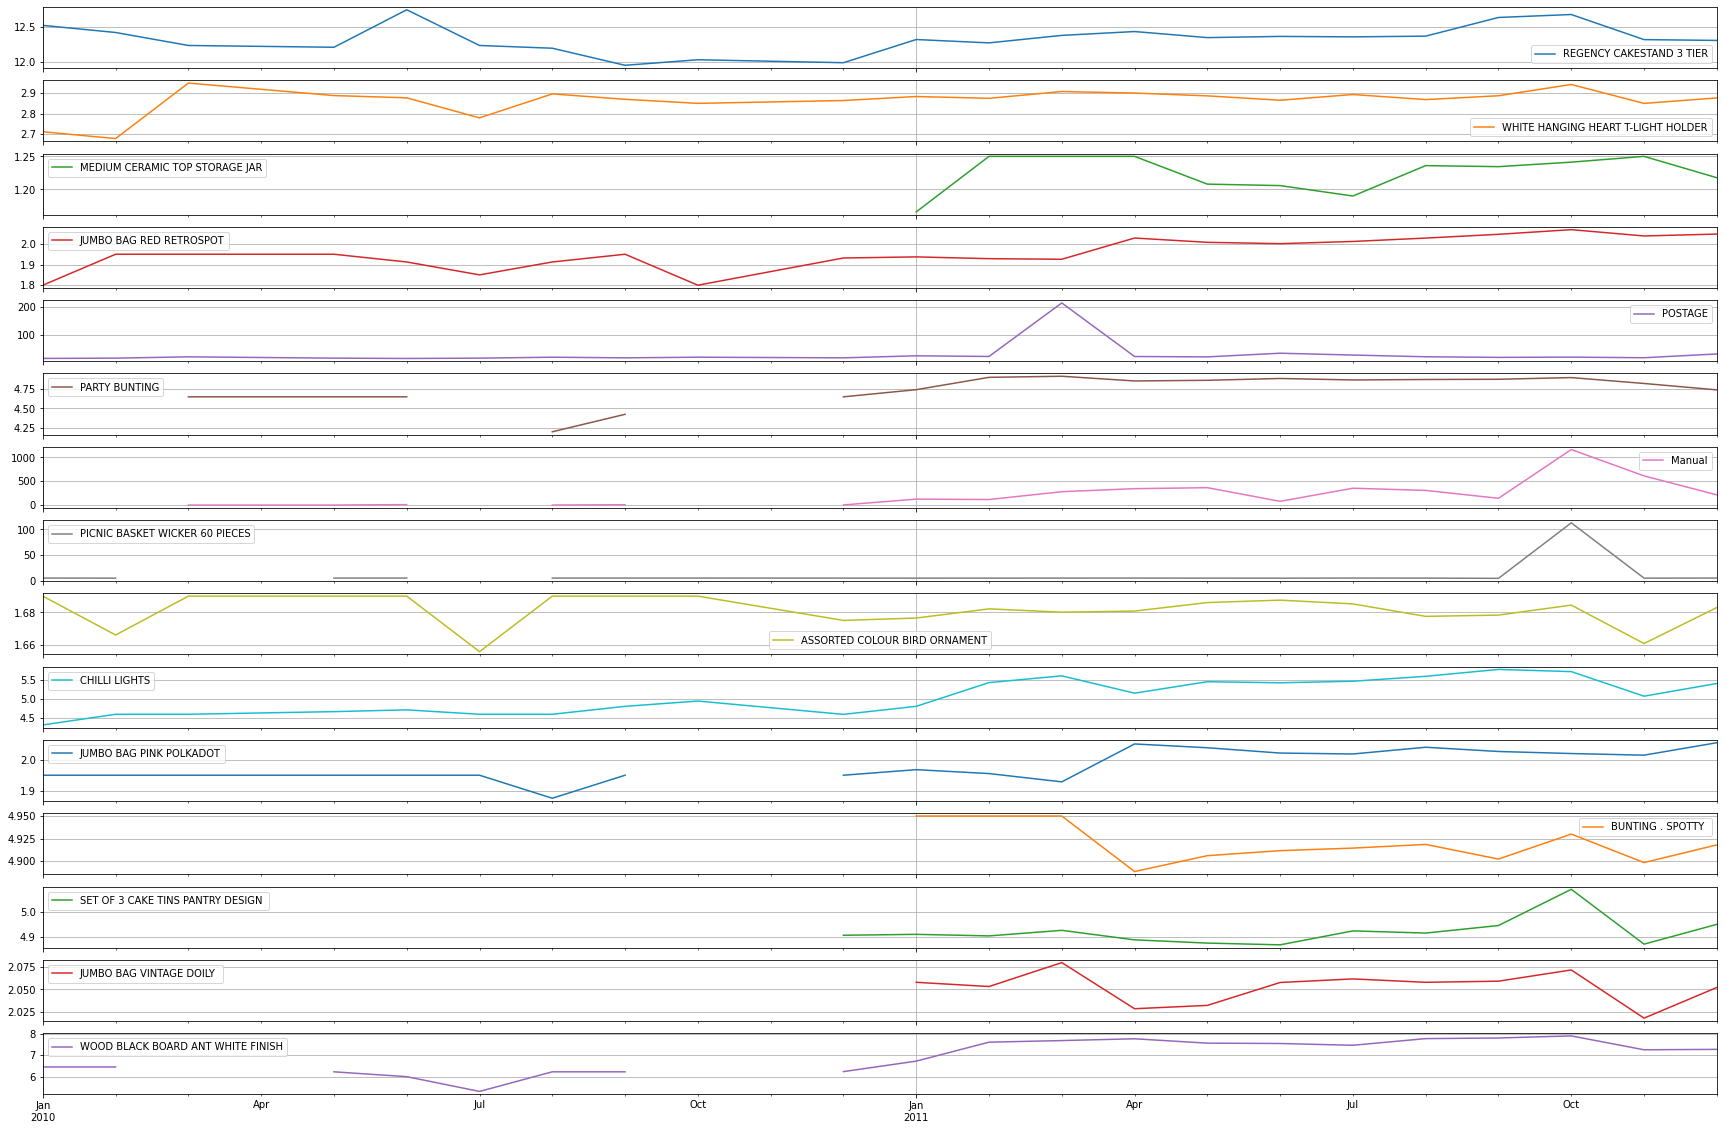

In [9]:
# Самые продаваемые товары
top_names = df_clean.loc[df_clean['Quantity'] > 0, ['ProductID', 'Sum']].groupby(by = 'ProductID').sum().sort_values(by = 'Sum', ascending = False)[:15]
# top_names
df_top_names = pd.DataFrame(index = top_names.index, columns = np.sort(df_in['InvoiceMonth'].unique()))
for month in df_top_names.columns:
    df_top_names[month] = df_clean.loc[(df_clean['InvoiceMonth'] == month) & (df_clean['ProductID'].isin(top_names.index)), 
                       ['ProductID', 'PricePerItem']].groupby(by = 'ProductID').mean()
         
#     break
df_top_names.rename(index = product_dict).transpose().plot(figsize =(30, 20),  grid = True,subplots = True)

In [10]:
df_top_names['Name'] = df_top_names.index.map(product_dict)
df_top_names

,2010-01,2010-02,2010-03,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,Name
ProductID,,,,,,,,,,,,,,,,,,,,,,,
22423,12.5250,12.422727,12.235714,12.210000,12.750000,12.235714,12.196154,11.950000,12.030000,11.987324,12.321429,12.273077,12.381023,12.436452,12.349026,12.366270,12.359790,12.370183,12.639197,12.681745,12.320149,12.308491,REGENCY CAKESTAND 3 TIER
85123A,2.7100,2.676316,2.950000,2.888462,2.877273,2.778571,2.896667,2.870000,2.850000,2.863978,2.883775,2.874752,2.908272,2.900709,2.886936,2.865447,2.893608,2.868644,2.887500,2.943032,2.849836,2.876716,WHITE HANGING HEART T-LIGHT HOLDER
23166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.166000,1.250000,1.250000,1.250000,1.208000,1.205789,1.190000,1.236000,1.234444,1.241250,1.250000,1.217692,MEDIUM CERAMIC TOP STORAGE JAR
85099B,1.8000,1.950000,1.950000,1.950000,1.912500,1.850000,1.912500,1.950000,1.800000,1.931818,1.937143,1.928554,1.925670,2.028532,2.007750,2.001221,2.011958,2.028323,2.046584,2.069143,2.038611,2.047750,JUMBO BAG RED RETROSPOT
POST,17.0000,18.000000,22.666667,18.000000,16.803333,18.000000,21.333333,19.111111,21.333333,19.119667,26.358209,24.018704,215.264286,23.863000,22.502333,35.638077,29.034500,22.934479,20.730755,21.600430,19.490541,32.920541,POSTAGE
47566,NaN,NaN,4.650000,4.650000,4.650000,NaN,4.200000,4.425000,NaN,4.650000,4.742063,4.900909,4.914962,4.854255,4.862849,4.886170,4.867208,4.873077,4.875966,4.897802,4.822000,4.739535,PARTY BUNTING
M,10.1000,NaN,0.850000,0.720000,10.597500,NaN,1.110000,7.750000,NaN,3.589000,125.338750,116.832500,280.752821,344.352683,365.056400,79.135769,353.636190,307.680588,142.556250,1164.101967,612.137059,214.629091,Manual
22502,5.9500,5.783333,NaN,5.950000,5.950000,NaN,5.950000,5.950000,5.950000,5.850000,5.744118,5.792105,5.894444,5.919697,5.788710,5.700000,5.950000,5.878571,5.331250,112.791667,5.768182,5.950000,PICNIC BASKET WICKER 60 PIECES
84879,1.6900,1.666000,1.690000,1.690000,1.690000,1.655714,1.690000,1.690000,1.690000,1.675000,1.676479,1.682131,1.680103,1.680769,1.686033,1.687526,1.685200,1.677500,1.678293,1.684462,1.660732,1.682941,ASSORTED COLOUR BIRD ORNAMENT


In [11]:
# df_clean.info()

In [12]:
# Значения числовых параметров
df_clean[['Quantity', 'PricePerItem', 'Sum']].describe()

,Quantity,PricePerItem,Sum
count,323570.000000,323570.000000,323570.000000
mean,12.464496,3.592492,21.093277
std,190.848925,77.388355,231.408762
min,-74215.000000,0.000000,-77183.600000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.480000
75%,12.000000,3.750000,19.800000
max,74215.000000,38970.000000,77183.600000


In [13]:
df_clean.memory_usage(deep=True)

Index               2588560
InvoiceNo          20392405
ProductID          20086791
Name               27042581
Quantity            2588560
InvoiceDate        22947198
PricePerItem        2588560
CustomerID          2588560
Country            22703353
InvoiceMonth        2588560
InvoiceTime         2588560
InvoiceDate_Day    12942800
Sum                 2588560
dtype: int64

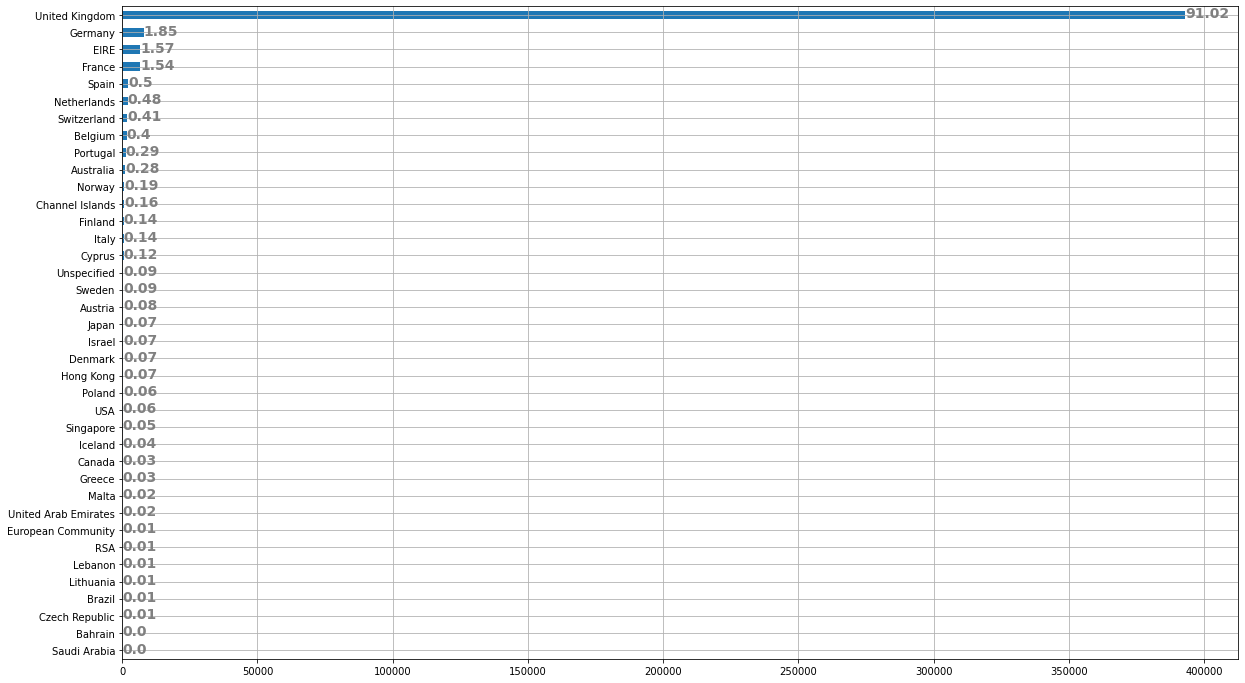

In [14]:
# Распеределение по странам
fig, ax = plt.subplots(figsize =(20, 12))
df_in.Country.value_counts().sort_values().plot.barh( grid = True)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.1,
             str(round((i.get_width() / df_in.shape[0] * 100), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
plt.show()

## Наименвания продуктов

In [15]:
produkt_names = df_in.Name.value_counts()
# Самые популярные товары
produkt_names[:20]

WHITE HANGING HEART T-LIGHT HOLDER    2033
REGENCY CAKESTAND 3 TIER              1914
JUMBO BAG RED RETROSPOT               1848
PARTY BUNTING                         1608
LUNCH BAG RED RETROSPOT               1435
SET OF 3 CAKE TINS PANTRY DESIGN      1253
ASSORTED COLOUR BIRD ORNAMENT         1242
PACK OF 72 RETROSPOT CAKE CASES       1200
LUNCH BAG  BLACK SKULL.               1132
JUMBO BAG PINK POLKADOT               1101
NATURAL SLATE HEART CHALKBOARD        1091
JAM MAKING SET WITH JARS              1067
JUMBO STORAGE BAG SUKI                1061
HEART OF WICKER SMALL                 1049
LUNCH BAG CARS BLUE                   1038
JAM MAKING SET PRINTED                1035
JUMBO SHOPPER VINTAGE RED PAISLEY     1023
SPOTTY BUNTING                        1021
POSTAGE                               1014
ROSES REGENCY TEACUP AND SAUCER       1001
Name: Name, dtype: int64

## История заказов каждого клиента

In [16]:
df_Customer_order = df_in[['CustomerID', 'InvoiceDate', 'ProductID']].groupby(by = ['CustomerID', 'InvoiceDate']).count()
df_Customer_order['sum'] = df_in[['CustomerID', 'InvoiceDate', 'PricePerItem']].groupby(by = ['CustomerID', 'InvoiceDate']).sum()
df_Customer_order

ProductID    sum
CustomerID InvoiceDate                     
12346.0    18.01.11 10:01          1   1.04
           18.01.11 10:17          1   1.04
12347.0    02.08.11 8:48          22  68.24
           07.04.11 10:43         24  62.29
           07.12.10 14:57         31  89.59
...                              ...    ...
18283.0    27.10.11 14:38         40  83.48
           28.02.11 10:30         30  70.55
18287.0    12.10.11 10:23         38  45.70
           22.05.11 10:39         29  56.92
           28.10.11 9:29           3   1.93

[18057 rows x 2 columns]

## Итог предварительного обзора данных

    Данные предоставленны по онлайн магазину находящемуся в Великобритании
    Магазин похоже специализируется на товарах для вечеринок

## Вероятность совершения заказа клиентом в период 01.11.11 - 30.11.11

In [17]:
df_clean.head()

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom,2010-01,8,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom,2010-01,8,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom,2010-01,8,2010-01-12,20.34


In [174]:
115/17
len(np.sort(df_in['InvoiceMonth'].unique()))

22

In [164]:
class Data_preparation:

    def __init__(self, df,
                 period='all',  # all, first, last
                 goal='learn'  # learn, pred
                 ):
        self.df = df
        self.period = period
        self.goal = goal
        self.n_0 = 0
        if period == 'last':
            self.n_0 = 14

    def preparation(self):
        df = self.df
        month_list = np.sort(df['InvoiceMonth'].unique())
        customer_list = df['CustomerID'].unique()
        print('Клиентов:', len(customer_list))
        df_Cust = pd.DataFrame(index=customer_list,
                               columns=pd.MultiIndex.from_tuples([(month, 'buy') for month in month_list]),
                               )
        n_min = 2
        n_max = 4
        for i, month in enumerate(month_list):
            df_Cust[(month, 'Sum_buy')] = df.loc[(df['Quantity'] > 0)
                                                       &
                                                       (df['InvoiceMonth'] == month),
                                                       ['CustomerID', 'Sum']].groupby('CustomerID').sum()
            df_Cust_ = df_Cust

        for i, month in enumerate(month_list):
            df_Cust[(month, 'y_buy')] = (df.loc[(df['InvoiceMonth'] == month)
                                                &
                                                (df['Sum'] > 0),  # Исключаем возвраты товаров
                                                'CustomerID'].value_counts() > 0).astype(int)
            df_Cust[(month, 'Sum_return')] = df.loc[(df['Quantity'] < 0)
                                                          &
                                                          (df['InvoiceMonth'] == month),
                                                          ['CustomerID', 'Sum']].groupby('CustomerID').sum()

            df_Cust[(month, 'mov_av_sum')] = df_Cust_.loc[:, month_list[i - n_min: i + 1]].mean(1) - df_Cust_.loc[:,
                                                                                                     month_list[
                                                                                                     i - n_max: i + 1]].mean(1)

        df_out = df_Cust.sort_index(axis=1)
        df_out = df_out.fillna(0)

        #     Разбиваем на периоды
        ar_train = np.array([])
        ar_test = np.array([])
        stap = 8
        col_gr = 5
        count_per = 23 - stap
        n_0 = self.n_0
        for i_, i in enumerate(list(range(n_0, 23 - stap))):
            print(i_, i)
            i_f = i * col_gr
            i_s = i_f + stap * col_gr
            #     print(i_f, i_s)
            #     print(df_Customer_order_in_period.columns[i_f:i_s])
            ar = df_out.values[:, i_f:i_s]
            ar_train_, ar_test_ = train_test_split(ar, test_size=0.15, random_state=17)
            if i_ > 0:
                ar_train = np.vstack((ar_train, ar_train_))
                ar_test = np.vstack((ar_test, ar_test_))
                ar_all = np.vstack((ar_all, ar))
            else:
                ar_train, ar_test = ar_train_, ar_test_
                ar_all = ar
            if self.period in ['first', 'last']: break

        if self.goal == 'learn':
            X_train, y_train = ar_train[:, :-4], ar_train[:, -1]
            X_test, y_test = ar_test[:, :-4], ar_test[:, -1]
            return X_train, y_train, X_test, y_test, count_per
        if self.goal == 'pred':
            return ar_all[:, 4:]
X_train, y_train, X_test, y_test, _ = Data_preparation(df_clean, 'last').preparation()
print(X_train.shape, y_train.shape, 
          X_test.shape, y_test.shape)

Клиентов: 4010
0 14
(3408, 36) (3408,) (602, 36) (602,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [95]:
60150/4010

15.0

In [56]:
# # X = df_Customer_order_in_period[month_list[:-1]]#.values
# # y = df_Customer_order_in_period[month_list[-1]]['buy']#.values
# transformer = RobustScaler()
# X = transformer.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=17)

In [98]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([45247,  9289]))

## Самое простое предсказание

In [520]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [523]:
# clf = LogisticRegressionCV(max_iter = 5000, cv = 5).fit(X_train, y_train)
# precision_score(y_test, clf.predict(X_test))
# recall_score(y_train, clf.predict(X_train)), recall_score(y_test, clf.predict(X_test))

0.920265780730897

## Деревья решений

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [59]:
clf = DecisionTreeClassifier(
#     max_depth = 5,
#     max_features = 5,
#         min_samples_split = 4,
                            ).fit(X_train, y_train)
# clf.score(X_train, y_train), clf.score(X_test, y_test)
recall_score(y_train, clf.predict(X_train)), recall_score(y_test, clf.predict(X_test))

(1.0, 1.0)

In [377]:
tree = DecisionTreeClassifier()
print(np.mean(cross_val_score(tree, X_train, y_train, scoring='recall', cv=5)))
tree_params = {
#     'max_depth': range(40,55, 1),
#     'max_features': range(5,10, 1), 
#     'max_leaf_nodes' : range(350,600, 5)
            }
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1,verbose=True, scoring = 'recall')
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_, tree_grid.best_score_)

0.052548076923076927
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{} 0.05567307692307692


In [257]:
# tree_grid.__dict__

In [112]:
# X_train.columns[30]

In [113]:
# fig = plt.figure(figsize=(18,12))
# tree.plot_tree(clf,filled = True, fontsize = 20)
# plt.show()

## Случайный лес

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [379]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [381]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
print(np.mean(cross_val_score(forest, X_train, y_train, scoring='recall', cv=5)))
forest_params = {
#     'max_depth': range(10,30),
#     'max_features': range(15,25)
                }
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1,verbose=True)
forest_grid.fit(X_train, y_train)
print(forest_grid.best_params_, forest_grid.best_score_)

0.03091346153846154
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{} 0.893780062957269


In [292]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# scores = cross_val_score(clf, X, y, scoring='recall' , cv=4)
# tree.best_params_
# clf.fit(X_train, y_train)
# print(scores)

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

In [332]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

## xgboost

In [102]:
from xgboost import XGBClassifier

In [109]:
param_dist = {}
model = XGBClassifier()
print(X_train.shape)
model.fit(X_train, y_train, eval_metric='logloss')
recall_score(y_train, model.predict(X_train)), recall_score(y_test, model.predict(X_test))

(51120, 36)


/home/mikhaylov-yv/PycharmProjects/venvs/DS_3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(1.0, 1.0)

## Оценка модели

Оптимальной считаю оценку модели **recall_score**

Так как даннае имеют сильный дисбаланс значение **True** (клиент совершил покупку в период) имеют примерно 10%
против **False** (клиент не совершил покупку в период) 90%

In [62]:
clf = model

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [64]:
recall_score(y_test, clf.predict(X_test))

1.0

Лучший результат пока дает простое дерево без подбора параметров
    
    Простое дерево из коробки: 0.35294117647058826
    Дерево с кросвалидацией: 0.35294117647058826
        {'max_depth': 48, 'max_features': 7, 'max_leaf_nodes': 540}

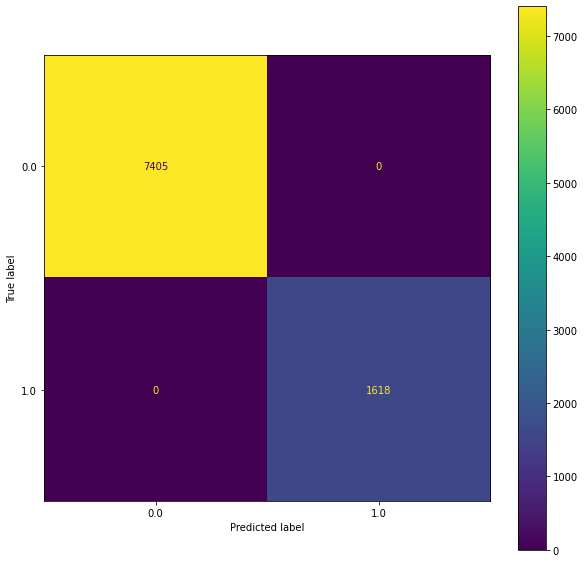

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax = ax)

## Анализ ошибок

In [423]:
df_err = pd.DataFrame(index = X_test.index)
df_err['y_true'] = y_test
df_err['y_pred'] = clf.predict(X_test)
df_err['error'] = (df_err['y_true'] == df_err['y_pred'])
df_err['assurance'] = clf.predict_proba(X_test).max(1)
df_err.head()

,y_true,y_pred,error,assurance
16674.0,False,False,True,0.951934
16050.0,False,False,True,0.940247
12738.0,False,False,True,0.701310
16235.0,False,False,True,0.728918
16168.0,True,True,True,0.787628


In [472]:
top_err = df_err[(df_err.y_true == True) & (df_err.error == False) & (df_err.assurance > 0.95)].sort_values(by = 'assurance', ascending = False)
top_err_customer_list = top_err.index
top_False_err = df_err[(df_err.y_true == False) & (df_err.error == False) & (df_err.assurance > 0.6)].sort_values(by = 'assurance', ascending = False)
top_False_err_customer_list = top_False_err.index
top_err
top_true

,y_true,y_pred,error,assurance
13263.0,True,True,True,0.829045
16168.0,True,True,True,0.787628
14849.0,True,True,True,0.701993
13408.0,True,True,True,0.686919
14738.0,True,True,True,0.682943


In [473]:
df_Customer_order_in_period.loc[top_err_customer_list, :].transpose()

16919.0 16843.0 16365.0 12395.0 12518.0 14299.0  \
2010-01      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-02      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-03      buy            False   False   False    True   False   False   
             count_buy        0.0     0.0     0.0    12.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-05      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-06      buy             True   False   False   False   False   False   
             count_buy       22.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-07      buy            False   False    True   False   False   False   
             count_buy        0.0     0.0     6.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-08      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     2.0   
2010-09      buy            False   False   False   False   False    True   
             count_buy        0.0     0.0     0.0     0.0     0.0     5.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-10      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-12      buy             True   False    True    True   False   False   
             count_buy       43.0     0.0     1.0    19.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     2.0   
2011-01      buy            False    True   False   False   False    True   
             count_buy        0.0    19.0     0.0     0.0     0.0    10.0   
             count_return     0.0     0.0     0.0     0.0     0.0     2.0   
2011-02      buy            False    True   False   False   False   False   
             count_buy        0.0    28.0     0.0     0.0     0.0     0.0   
             count_return     0.0     1.0     0.0     1.0     0.0     5.0   
2011-03      buy            False   False    True    True   False   False   
             count_buy        0.0     0.0     3.0    10.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2011-04      buy             True   False   False    True   False   False   
             count_buy       54.0     0.0     0.0    17.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2011-05      buy             True    True   False    True   False   False   
             count_buy       83.0   150.0     0.0    11.0     0.0     0.0   
             count_return     0.0     0.0     0.0     1.0     0.0     0.0   
2011-06      buy             True    True   False    True   False    True   
             count_buy       88.0    70.0     0.0    10.0     0.0     9.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2011-07      buy            False    True    True   False   False   False   
             count_buy        0.0    89.0     6.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2011-08      buy      

In [474]:
df_Customer_order_in_period.loc[top_False_err_customer_list, :].transpose()

13694.0 12749.0 16394.0 16626.0 12471.0 14239.0  \
2010-01      buy             True   False   False   False   False   False   
             count_buy        6.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-02      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     1.0     0.0   
2010-03      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-05      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-06      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-07      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-08      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-09      buy            False   False   False   False   False   False   
             count_buy        0.0     0.0     0.0     0.0     0.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-10      buy            False   False   False   False    True   False   
             count_buy        0.0     0.0     0.0     0.0    48.0     0.0   
             count_return     0.0     0.0     0.0     0.0     0.0     0.0   
2010-12      buy             True   False   False   False    True   False   
             count_buy       40.0     0.0     0.0     0.0    28.0     0.0   
             count_return     1.0     0.0     0.0     0.0    15.0     0.0   
2011-01      buy             True    True   False   False    True    True   
             count_buy       48.0    85.0     0.0     0.0     7.0    23.0   
             count_return     5.0     0.0     0.0     0.0     3.0     0.0   
2011-02      buy             True   False    True    True    True    True   
             count_buy       29.0     0.0    26.0     3.0    14.0    34.0   
             count_return     0.0     0.0     0.0     0.0     8.0     0.0   
2011-03      buy             True   False   False    True    True   False   
             count_buy       53.0     0.0     0.0    47.0    36.0     0.0   
             count_return     0.0     0.0     0.0     1.0     3.0     3.0   
2011-04      buy             True   False   False    True    True   False   
             count_buy       78.0     0.0     0.0     8.0    29.0     0.0   
             count_return     0.0     0.0     6.0     0.0     0.0     0.0   
2011-05      buy             True   False    True   False    True    True   
             count_buy       46.0     0.0    24.0     0.0    46.0    18.0   
             count_return     2.0    11.0     0.0     0.0     9.0     1.0   
2011-06      buy             True   False    True    True   False    True   
             count_buy       15.0     0.0    10.0    10.0     0.0    10.0   
             count_return     1.0     0.0     2.0     0.0     1.0     0.0   
2011-07      buy             True   False   False    True    True    True   
             count_buy       20.0     0.0     0.0     7.0    34.0     6.0   
             count_return     0.0     0.0     0.0     0.0     2.0     0.0   
2011-08      buy      

In [451]:
top_err_customer_df = df_clean[df_clean['CustomerID'].isin(top_err_customer_list)]
top_err_customer_df.head()

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,03.12.10 10:36,2.95,13520.0,Switzerland,2010-03,10,2010-03-12,88.5
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,03.12.10 10:36,1.65,13520.0,Switzerland,2010-03,10,2010-03-12,59.4
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,03.12.10 10:36,1.65,13520.0,Switzerland,2010-03,10,2010-03-12,39.6
5323,536858,20677,PINK POLKADOT BOWL,16,03.12.10 10:36,1.25,13520.0,Switzerland,2010-03,10,2010-03-12,20.0
5324,536858,20750,RED RETROSPOT MINI CASES,2,03.12.10 10:36,7.95,13520.0,Switzerland,2010-03,10,2010-03-12,15.9


In [454]:
top_err_customer_df.groupby('CustomerID').mean()

,Quantity,PricePerItem,InvoiceTime,Sum
CustomerID,,,,
12359.0,6.472000,8.623040,12.648000,25.347120
12383.0,15.290000,3.093600,12.800000,18.393100
12395.0,15.156522,4.005913,13.913043,19.377826
12518.0,10.605263,2.879737,12.881579,16.194605
12590.0,61.128571,10.266571,14.000000,140.876857
12669.0,10.921569,24.746863,9.676471,15.762059
13232.0,3.869822,3.236686,12.431953,6.202959
13520.0,17.284211,4.918421,11.357895,36.713158
14299.0,9.984375,3.925078,11.710938,15.954297


In [160]:
# Клиенты останутся 
df_test = df_in[df_in.CustomerID.isin([16919.0, 16843.0])]
df_test = df_test.loc[df_test.InvoiceMonth < '2011-12']
df_test

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,InvoiceTime,InvoiceDate_Day,Sum
12244,537372,48187,DOORMAT NEW ENGLAND,4,06.12.10 12:52,7.95,16919.0,United Kingdom,2010-06,12,2010-06-12,31.80
12245,537372,48111,DOORMAT 3 SMILEY CATS,1,06.12.10 12:52,7.95,16919.0,United Kingdom,2010-06,12,2010-06-12,7.95
12246,537372,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,06.12.10 12:52,7.95,16919.0,United Kingdom,2010-06,12,2010-06-12,15.90
12247,537372,21524,DOORMAT SPOTTY HOME SWEET HOME,2,06.12.10 12:52,7.95,16919.0,United Kingdom,2010-06,12,2010-06-12,15.90
12248,537372,48185,DOORMAT FAIRY CAKE,1,06.12.10 12:52,7.95,16919.0,United Kingdom,2010-06,12,2010-06-12,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...
423890,573163,22630,DOLLY GIRL LUNCH BOX,12,28.10.11 9:06,1.95,16843.0,United Kingdom,2011-10,9,2011-10-28,23.40
423891,573163,22629,SPACEBOY LUNCH BOX,12,28.10.11 9:06,1.95,16843.0,United Kingdom,2011-10,9,2011-10-28,23.40
423892,573163,22138,BAKING SET 9 PIECE RETROSPOT,6,28.10.11 9:06,4.95,16843.0,United Kingdom,2011-10,9,2011-10-28,29.70
423893,573163,22617,BAKING SET SPACEBOY DESIGN,3,28.10.11 9:06,4.95,16843.0,United Kingdom,2011-10,9,2011-10-28,14.85


In [165]:
month
test_data.shape

Клиентов: 2
0 14


(2, 0)

In [166]:
model.predict(test_data)

ValueError: Feature shape mismatch, expected: 36, got 2

## Сохранение ответа

In [ ]:
def save_csv(X, model):
    df_out = pd.DataFrame({'prob': model.predict_proba(X)[:,1]}, 
                          index = X.index)
    df_out.index.name = 'CustomerID'
    df_out.to_csv('pred.csv', sep = ';')
    return df_out
df_out = save_csv(df_Customer_order_in_period[df_Customer_order_in_period.columns[3:]], clf)

In [ ]:
df_Customer_order_in_period.loc[[df_out.sort_values(by = 'prob').index[0],
                                 df_out.sort_values(by = 'prob').index[-1]], :]

## Анализ ошибок

In [11]:
dp_dat = dp.Data_preparation(df_clean, month_list, goal = 'pred')
df_pred = dp_dat.preparation()
Cust_list = dp_dat.Cust_list
print(df_pred.shape)
pred = model.predict(df_pred)

Клиентов: 4010
(4010, 45)


In [36]:
df_chek = pd.DataFrame({'pred': pred}, index = Cust_list)
df_chek['true'] = (df_clean.loc[(df_clean.Quantity > 0) & (df_clean.InvoiceMonth == '2011-12'), 'CustomerID'].value_counts() > 0).astype(int)
df_chek['true'] = df_chek['true'].fillna(0)
df_chek['er'] = df_chek['pred'] != df_chek['true']
# df_chek[(df_chek['er'] == False) & (df_chek['true'] == 1)]
recall_score(df_chek['true'], df_chek['pred'])

0.23529411764705882